In [2]:
%matplotlib inline
import sys                                 
import os                                  
import numpy as np                         
import matplotlib.pyplot as plt            
                                           
                                           
caffe_root = os.environ["CAFFE_ROOT"]      
os.chdir(caffe_root)                       
print caffe_root                           
sys.path.insert(0, caffe_root + 'python')  
import caffe                               

/home/maohz12/pruning/


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [3]:
prototxt = '/home/maohz12/pruning/3_prototxt_solver/lenet5/train_val.prototxt'             
caffemodel = '/home/maohz12/pruning/4_model_checkpoint/lenet5.caffemodel'                                                 
                                                                                          
net = caffe.Net(prototxt, caffemodel, caffe.TEST)                                         

conv1


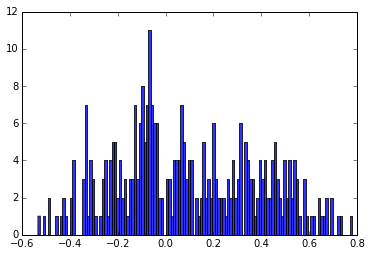

conv2


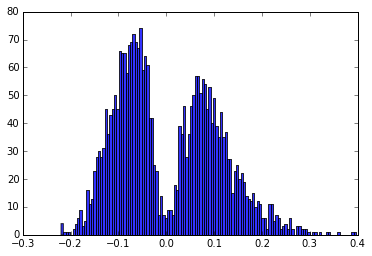

ip1


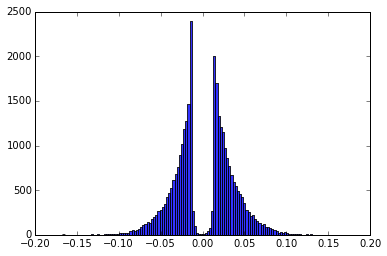

ip2


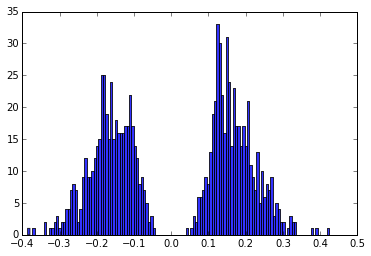

In [4]:
layers = filter(lambda x:'conv' in x or 'fc' or 'ip' in x, net.params.keys())
for i,layer in enumerate(layers):
    W = net.params[layer][0].data                                                            
    numBins = 128       
    
    W_no = W[np.where(abs(W) > 10e-5 )]
    std = np.std(W_no)
    W_no = W_no[np.where((abs(W_no) < 5 * std))]
    print layer
    plt.hist(W_no.flatten(), numBins, color='blue', alpha=0.8) 
    plt.show()         